In [1]:
import os, time
import numpy as np
import pandas as pd
from tqdm.notebook import trange, tqdm
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver
from entities.solver_process import SolverProcess  
from lib.common import disarrange
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns
import config.hyperparams as hp
import datetime as dt
from multiprocessing import Queue

### WLAN-LRZ AP Data Loader ####
desc = wlanlrz_loader.load_data_description(hp.AP_DESCR)
original_data, coord_dataframe_list, total_ap, original_merged_raw_ap_data = \
wlanlrz_loader.load_data_parallel(hp.BUILDING, desc, mass_load=True)

Parallel loading of APs data ...
Activating threads now


 67%|██████▋   | 2/3 [00:00<00:00,  7.10it/s]]

 50%|█████     | 1/2 [00:00<00:00,  2.64it/s]]

File not found!


 43%|████▎     | 3/7 [00:01<00:01,  2.62it/s]]

File not found!




 50%|█████     | 6/12 [00:02<00:02,  2.43it/s]

File not found!


  2%|▎         | 1/40 [00:00<00:19,  1.95it/s]

File not found!


  0%|          | 0/11 [00:00<?, ?it/s].94it/s]

File not found!



 50%|█████     | 1/2 [00:00<00:00,  2.51it/s]]

File not found!



  0%|          | 0/17 [00:00<?, ?it/s].04it/s]

File not found!


 47%|████▋     | 9/19 [00:03<00:05,  1.97it/s]

File not found!


100%|██████████| 2/2 [00:00<00:00,  2.10it/s]]]

File not found!


  3%|▎         | 1/29 [00:00<00:15,  1.80it/s]

File not found!


  0%|          | 0/6 [00:00<?, ?it/s]1.91it/s]s]

File not found!


 23%|██▎       | 3/13 [00:02<00:06,  1.49it/s]

File not found!


 29%|██▉       | 5/17 [00:03<00:07,  1.51it/s]]

File not found!



 90%|█████████ | 9/10 [00:04<00:00,  1.45it/s]

File not found!


 64%|██████▍   | 9/14 [00:05<00:03,  1.37it/s]]

File not found!


 43%|████▎     | 9/21 [00:05<00:08,  1.39it/s]


File not found!


 35%|███▍      | 8/23 [00:05<00:10,  1.37it/s]]

File not found!


  9%|▊         | 13/152 [00:06<01:34,  1.47it/s]

File not found!


 46%|████▌     | 6/13 [00:04<00:05,  1.39it/s]

File not found!


 18%|█▊        | 4/22 [00:03<00:14,  1.24it/s]]

File not found!


 38%|███▊      | 6/16 [00:04<00:08,  1.24it/s]]

File not found!


  7%|▋         | 1/15 [00:00<00:12,  1.10it/s]]

File not found!


100%|██████████| 4/4 [00:03<00:00,  1.07it/s]]]

File not found!


 33%|███▎      | 3/9 [00:02<00:05,  1.11it/s]]s]

File not found!


100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

File not found!


100%|██████████| 6/6 [00:05<00:00,  1.17it/s]]]

File not found!



  4%|▍         | 1/25 [00:00<00:21,  1.12it/s]

File not found!


 40%|████      | 4/10 [00:02<00:04,  1.40it/s]]

 92%|█████████▏| 12/13 [00:09<00:00,  1.16it/s]

File not found!


 44%|████▎     | 17/39 [00:11<00:20,  1.08it/s]

File not found!


100%|██████████| 3/3 [00:02<00:00,  1.08it/s]s]

  2%|▏         | 1/46 [00:01<00:46,  1.04s/it]

File not found!


 20%|██        | 5/25 [00:04<00:19,  1.04it/s]

File not found!


 50%|█████     | 3/6 [00:02<00:02,  1.06it/s]]]

 90%|█████████ | 19/21 [00:14<00:02,  1.03s/it]

  0%|          | 0/6 [00:00<?, ?it/s]1.01s/it]]

File not found!


 75%|███████▌  | 3/4 [00:03<00:01,  1.02s/it]t]

File not found!


 67%|██████▋   | 2/3 [00:02<00:01,  1.10s/it]]]

 59%|█████▉    | 23/39 [00:18<00:17,  1.09s/it]

File not found!


 77%|███████▋  | 24/31 [00:18<00:07,  1.10s/it]

 77%|███████▋  | 10/13 [00:10<00:03,  1.04s/it]

100%|██████████| 5/5 [00:05<00:00,  1.01s/it]t]


  0%|          | 0/3 [00:00<?, ?it/s].01it/s]t]

100%|██████████| 1/1 [00:00<00:00,  1.01it/s]t]

 50%|█████     | 1/2 [00:01<00:01,  1.09s/it]]]


File not found!


100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

File not found!


100%|██████████| 1/1 [00:01<00:00,  1.03s/it]s]]

 16%|█▌        | 10/63 [00:10<00:54,  1.02s/it]

File not found!


 24%|██▍       | 11/46 [00:11<00:34,  1.01it/s]

File not found!


  3%|▎         | 1/39 [00:00<00:32,  1.17it/s]]

  4%|▎         | 1/27 [00:00<00:22,  1.14it/s]]

File not found!


 56%|█████▋    | 18/32 [00:17<00:14,  1.03s/it]

File not found!


  6%|▋         | 2/32 [00:02<00:29,  1.02it/s]]

100%|██████████| 4/4 [00:03<00:00,  1.09it/s]t]

100%|██████████| 9/9 [00:08<00:00,  1.01it/s]t]

100%|██████████| 9/9 [00:08<00:00,  1.00it/s]s]]

 87%|████████▋ | 13/15 [00:12<00:01,  1.07it/s]]

File not found!


100%|██████████| 6/6 [00:05<00:00,  1.08it/s]s]

100%|██████████| 8/8 [00:07<00:00,  1.13it/s]]]

File not found!




 66%|██████▌   | 21/32 [00:20<00:08,  1.22it/s]

File not found!


 43%|████▎     | 23/53 [00:22<00:22,  1.35it/s]

File not found!


 76%|███████▋  | 13/17 [00:11<00:03,  1.32it/s]


100%|██████████| 17/17 [00:14<00:00,  1.18it/s]

File not found!



100%|██████████| 12/12 [00:08<00:00,  1.38it/s]]


 58%|█████▊    | 33/57 [00:27<00:08,  2.88it/s]

File not found!


 71%|███████   | 49/69 [00:36<00:07,  2.75it/s]

File not found!


100%|██████████| 152/152 [00:48<00:00,  3.11it/s]


In [202]:
## This will change the style of the plots a bit
import matplotlib

plt.style.use('classic')

matplotlib.rcParams['axes.facecolor'] = 'w'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rcParams['lines.color'] = 'xkcd:blue'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20

width = 7
height = width / 1.618

# Use matplotlib fonts
matplotlib.rcParams['text.usetex']=True

In [16]:
from lib.common import generate_agents, generate_edge_nodes

T1_RATIO_VEC_REL = np.array([0.5, 0.25, 0.15, 0.05])
T2_RATIO_VEC_REL = np.array([0.25, 0.20, 0.10, 0.05])
T3_RATIO_VEC_REL = np.array([0.01, 0.0075, 0.005, 0.001])

T1_RATIO_VEC_ABS = np.array([350, 250, 150, 100])
T2_RATIO_VEC_ABS = np.array([200, 100, 50, 25])
T3_RATIO_VEC_ABS = np.array([10, 5, 2, 0])

TARGET_MA = [500, 1000, 2000, 4000]

RESULTS = []

print("Total APs: {}".format(total_ap))
original_data['timestamp'] = original_data.index

for target_ma in TARGET_MA:
    
    # Filter the dataser based on the minimum amount of users we want to serve
    data = original_data[(original_data.total >= target_ma) & (original_data.total < (target_ma*1.1))].sample()
    merged_raw_ap_data = original_merged_raw_ap_data[original_merged_raw_ap_data.index.isin(data.index)]
    merged_raw_ap_data = merged_raw_ap_data.loc[:, (merged_raw_ap_data > 0).all()]

    MA = int(data.total)
    total_ap = len(merged_raw_ap_data.columns)
    
    for experiments in range(len(T1_RATIO_VEC_REL)):    

        print(" === Iteration {} for MA {} ===".format(experiments, MA))

        #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[experiments]))
        #TIER_2_EN = int(T2_RATIO_VEC_REL[experiments] * MA)
        #TIER_3_EN = int(T3_RATIO_VEC_REL[experiments] * MA)
        
        TIER_1_EN = T1_RATIO_VEC_ABS[experiments]
        TIER_2_EN = T2_RATIO_VEC_ABS[experiments]
        TIER_3_EN = T3_RATIO_VEC_ABS[experiments]
        
        EN_RATIO = (TIER_1_EN, TIER_2_EN, TIER_3_EN)
        TOTAL_EN = int(TIER_1_EN + TIER_2_EN + TIER_3_EN)

        if hp.STORE_RESULTS:
            try:
                os.mkdir(hp.CSV_FOLDER)
            except OSError:
                print ("Creation of the directory %s failed" % hp.CSV_FOLDER)
            else:
                print ("Successfully created the directory %s " % hp.CSV_FOLDER)

        if hp.dataset_rtt:
            ### LOAD LATENCY MATRIX FROM DATASET ###
            print("Loading rtt matrix from dataset")
            clf = rtt_matrix_loader.analyze_data(source=hp.dataset_rtt, drange=1000, threshold=250, k=3)
#             clf.weights_ = [0.2, 0.2, 0.6]
            rtt_matrix = rtt_matrix_loader.generate_data(clf, n=total_ap, m=TOTAL_EN)
        else:
            # Prepare latency matrixes for all the EN classes with increasing latency based on distance from the edge 
            rtt_matrix_en_t1 = np.round(abs(np.random.normal(1, 0.2, (TIER_1_EN, TIER_1_EN))))
            rtt_matrix_en_t2 = np.round(abs(np.random.normal(3, 1, (TIER_1_EN, TIER_2_EN))))
            rtt_matrix_en_t3 = np.round(abs(np.random.normal(10, 1, (TIER_1_EN, TIER_3_EN))))

            sns.distplot(rtt_matrix_en_t1.flatten(), hist=False, rug=True)
            sns.distplot(rtt_matrix_en_t2.flatten(), hist=False, rug=True)
            sns.distplot(rtt_matrix_en_t3.flatten(), hist=False, rug=True)

            rtt_matrix = np.hstack([rtt_matrix_en_t1, rtt_matrix_en_t2, rtt_matrix_en_t3])

        disarrange(rtt_matrix, axis=0)

        # Manually setting latency for colocated AP/EN
        for i in range(np.minimum(rtt_matrix.shape[0], rtt_matrix.shape[1])):
            rtt_matrix[i][i] = 1

        # print("Plotting and saving RTT matrix")
        # fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        # sns.heatmap(rtt_matrix, ax=ax)
        # fig.tight_layout(w_pad=1.5)
        # fig.savefig("../plots/rtt_matrix.pdf")

        print("Starting the solver")

        agents = generate_agents(MA, merged_raw_ap_data, 0)
        edge_nodes = generate_edge_nodes(EN_RATIO, merged_raw_ap_data, 0)
        
        env, agents, edge_nodes, convergence_time, _ = \
            solver.algorithm_v3(agents, edge_nodes, 5, 4, 100, None, None, rtt_matrix, merged_raw_ap_data, suppress_output=True)

        RESULTS.append((env, agents, edge_nodes, convergence_time))

        if hp.STORE_RESULTS:
            env.episodes_tracker[:,:,episode]
            np.savetxt(hp.CSV_FOLDER + '/' + str(episode) + '.csv', env.episodes_tracker[:,:,episode], delimiter=',')


Total APs: 360
 === Iteration 0 for MA 537 ===
Loading rtt matrix from dataset
(353, 560)
Starting the solver
 === Iteration 1 for MA 537 ===
Loading rtt matrix from dataset
(353, 355)
Starting the solver
 === Iteration 2 for MA 537 ===
Loading rtt matrix from dataset
(353, 202)
Starting the solver
 === Iteration 3 for MA 537 ===
Loading rtt matrix from dataset
(353, 125)
Starting the solver
 === Iteration 0 for MA 1076 ===
Loading rtt matrix from dataset
(713, 560)
Starting the solver
 === Iteration 1 for MA 1076 ===
Loading rtt matrix from dataset
(713, 355)
Starting the solver
 === Iteration 2 for MA 1076 ===
Loading rtt matrix from dataset
(713, 202)
Starting the solver
 === Iteration 3 for MA 1076 ===
Loading rtt matrix from dataset
(713, 125)
Starting the solver
 === Iteration 0 for MA 2034 ===
Loading rtt matrix from dataset
(1032, 560)
Starting the solver
 === Iteration 1 for MA 2034 ===
Loading rtt matrix from dataset
(1032, 355)
Starting the solver
 === Iteration 2 for MA 203

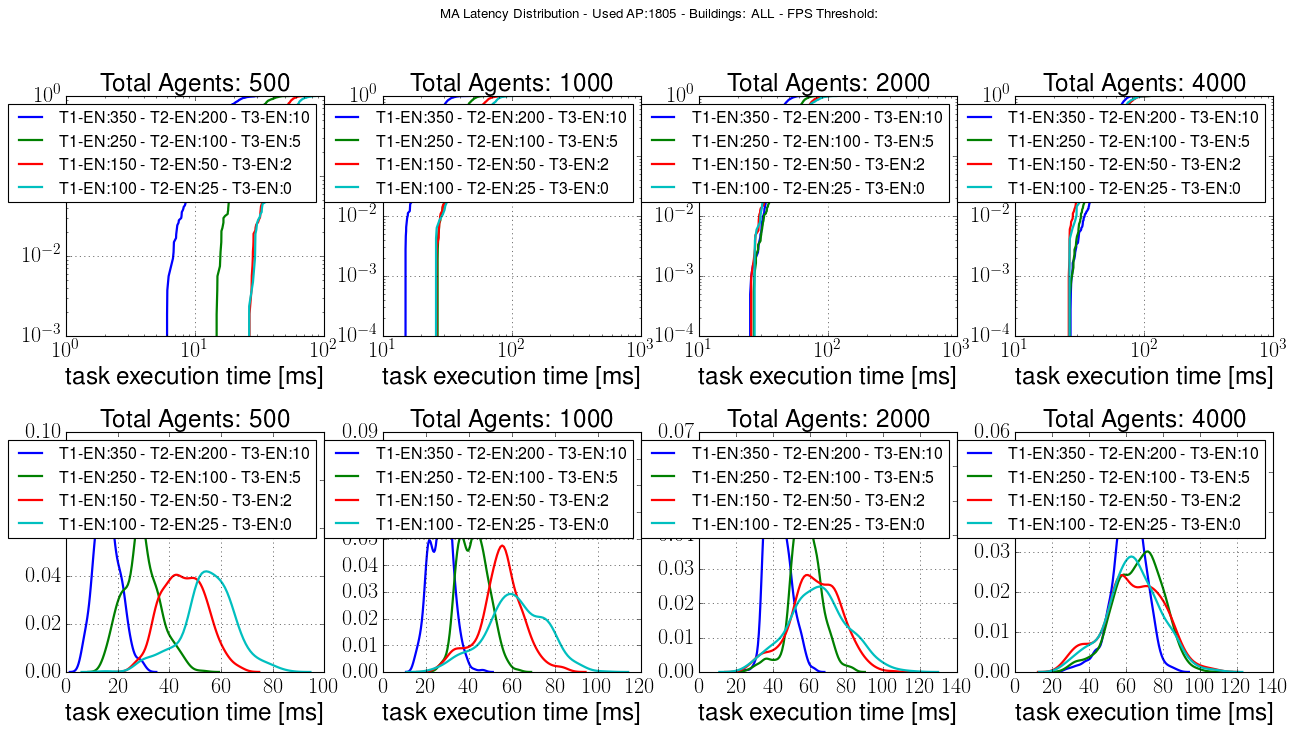

In [17]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 2

fig, ax = plt.subplots(m, n, figsize=(16, 8), constrained_layout=False)
fig.tight_layout()

agents_ls = []

## Latency
for i in range(n):
    agents_ls.append(RESULTS[0 + n*i][1])
    agents_ls.append(RESULTS[1 + n*i][1])
    agents_ls.append(RESULTS[2 + n*i][1])
    agents_ls.append(RESULTS[3 + n*i][1])

    for idx, agents in enumerate(agents_ls):
        curr_lat = list(map(lambda a: a.total_latency(), filter(lambda a: a.offload_target != Offloaded.Local, agents)))
        #curr_lat = list(map(lambda a: a.current_latency, agents))
        
        #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[idx]))
        #TIER_2_EN = int(T2_RATIO_VEC_REL[idx] * TARGET_MA[i])
        #TIER_3_EN = int(T3_RATIO_VEC_REL[idx] * TARGET_MA[i])
        
        TIER_1_EN = T1_RATIO_VEC_ABS[idx]
        TIER_2_EN = T2_RATIO_VEC_ABS[idx]
        TIER_3_EN = T3_RATIO_VEC_ABS[idx]

        label="T1-EN:{} - T2-EN:{} - T3-EN:{}".format(TIER_1_EN, TIER_2_EN, TIER_3_EN)
        powerlaw.plot_cdf(data=curr_lat, ax=ax[0][i], label=label)
        sns.distplot(curr_lat, hist=False, ax=ax[1][i], label=label)

    for row in range(m):
        ax[row][i].grid()
        ax[row][i].set_xlabel('task execution time [ms]')
        ax[row][i].set_title("Total Agents: {}".format(TARGET_MA[i]))
        ax[row][i].legend()

    agents_ls = []

fig.subplots_adjust(hspace=0.4)
fig.suptitle(
    "MA Latency Distribution - Used AP:{} - Buildings: ALL - FPS Threshold:"
    .format(total_ap, hp.FPS), fontsize=12, y=1.1)
fig.savefig("../plots/sss/ma_latency_distribution_4_cases.pdf", bbox_inches="tight")

#saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
#sns.distplot(saved_energy, ax=ax[1])
#ax[1].grid()
#ax[1].set_xlabel('saved battery [mJ]')

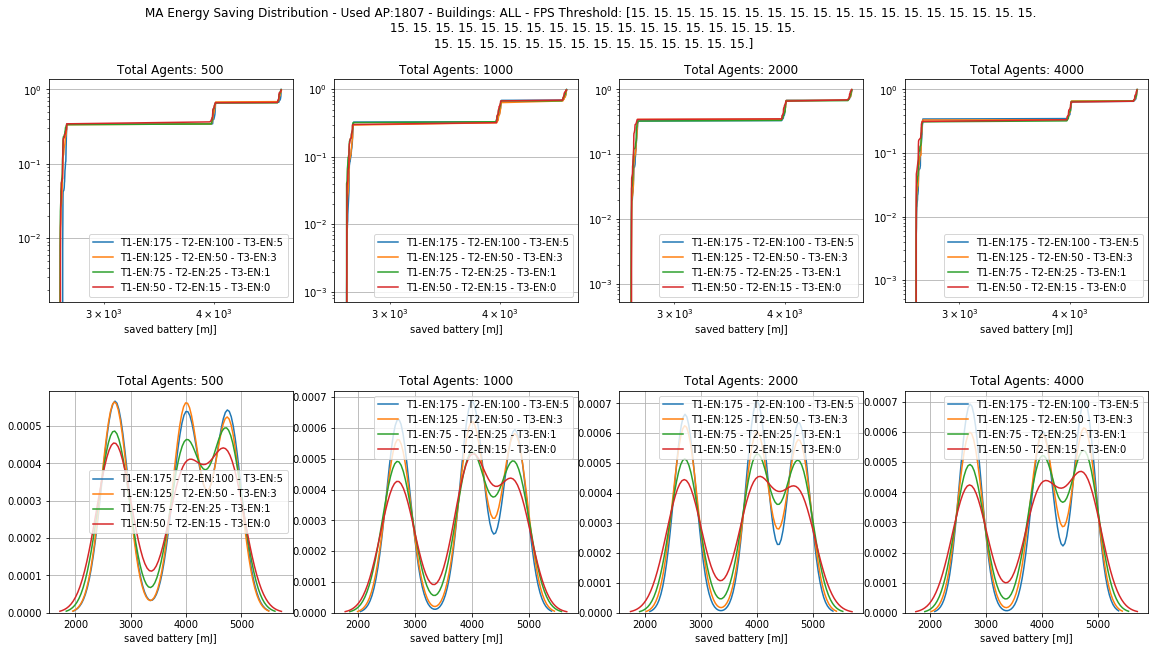

In [104]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 2

fig, ax = plt.subplots(m, n, figsize=(16, 8))
fig.tight_layout()

agents_ls = []

## Battery
for i in range(n):
    agents_ls.append(RESULTS[0 + n*i][1])
    agents_ls.append(RESULTS[1 + n*i][1])
    agents_ls.append(RESULTS[2 + n*i][1])
    agents_ls.append(RESULTS[3 + n*i][1])

    for idx, agents in enumerate(agents_ls):
        saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
        #saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, agents))
        
        #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[idx]))
        #TIER_2_EN = int(T2_RATIO_VEC_REL[idx] * TARGET_MA[i])
        #TIER_3_EN = int(T3_RATIO_VEC_REL[idx] * TARGET_MA[i])
        
        TIER_1_EN = T1_RATIO_VEC_ABS[idx]
        TIER_2_EN = T2_RATIO_VEC_ABS[idx]
        TIER_3_EN = T3_RATIO_VEC_ABS[idx]
        
        label="T1-EN:{} - T2-EN:{} - T3-EN:{}".format(TIER_1_EN, TIER_2_EN, TIER_3_EN)
        powerlaw.plot_cdf(data=saved_energy, ax=ax[0][i], label=label)
        sns.distplot(saved_energy, hist=False, ax=ax[1][i], label=label)

    for row in range(m):
        ax[row][i].grid()
        ax[row][i].set_xlabel('saved battery [mJ]')
        ax[row][i].set_title("Total Agents: {}".format(TARGET_MA[i]))
        ax[row][i].legend()

    agents_ls = []

fig.subplots_adjust(hspace=0.4)
fig.suptitle(
    "MA Energy Saving Distribution - Used AP:{} - Buildings: ALL - FPS Threshold: {}"
    .format(total_ap, hp.FPS), fontsize=12, y=1.1)

fig.savefig("../plots/sss/ma_energy_distribution_4_cases.pdf",  bbox_inches="tight")

#saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
#sns.distplot(saved_energy, ax=ax[1])
#ax[1].grid()
#ax[1].set_xlabel('saved battery [mJ]')

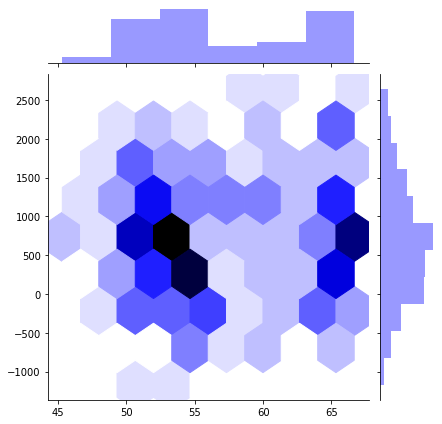

In [19]:
g = sns.jointplot(x=curr_lat, y=saved_energy, kind="hex", color="b");


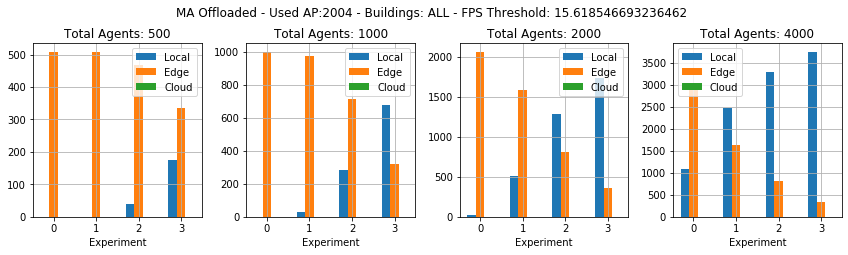

In [10]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 1

fig, ax = plt.subplots(m, n, figsize=(12, 3))
fig.tight_layout()

agents_ls = []
width = 0.2
new_agents = []

## Offload distribution
for i in range(n):
    agents_ls.append(RESULTS[0 + n*i][1])
    agents_ls.append(RESULTS[1 + n*i][1])
    agents_ls.append(RESULTS[2 + n*i][1])
    agents_ls.append(RESULTS[3 + n*i][1])

    v1_l = []
    v2_l = []
    v3_l = []
    
    for idx, agents in enumerate(agents_ls):
        v1_l.append(len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents))))
        v2_l.append(len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents))))
        v3_l.append(len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents))))
        
        
    x = np.arange(n)
    
    new_agents.append(v1_l)
    new_agents.append(v2_l)
    new_agents.append(v3_l)
    
    rects1 = ax[i].bar(x - width, v1_l, width, label='Local')
    rects2 = ax[i].bar(x, v2_l, width, label='Edge')
    rects3 = ax[i].bar(x + width, v3_l, width, label='Cloud')

    ax[i].grid()
    ax[i].set_xlabel('Experiment')
    ax[i].set_title("Total Agents: {}".format(TARGET_MA[i]))
    ax[i].legend()

    agents_ls = []

fig.subplots_adjust(hspace=0.4)
fig.suptitle(
    "MA Offloaded - Used AP:{} - Buildings: ALL - FPS Threshold: {}"
    .format(total_ap, hp.FPS[0]), fontsize=12, y=1.1)
fig.savefig("../plots/sss/ma_offloaded_4_cases.pdf",  bbox_inches="tight")

#create the dataframe from your data
# experiment = np.concatenate(
#     [
#         np.full(12,500), np.full(12, 1), np.full(12, 2), np.full(12, 3)])
# location = np.concatenate([np.full(16,"Local"), np.full(16, "Edge"), np.full(16, "Cloud")])

# df = pd.DataFrame({'experiment': experiment, 'location': location, 'agents': np.concatenate(new_agents)})

# #make your data numerical
# df = df.pivot(columns='location',index='experiment').fillna(0)

# #plot it
# df.plot(kind='bar',stacked=True,legend=False)
# plt.show()

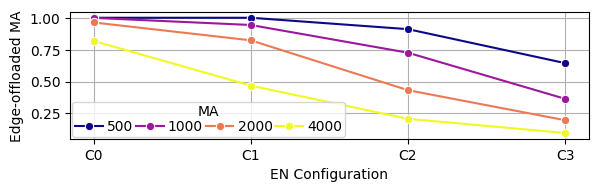

In [197]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 1

plt.style.use('default')

fig, ax = plt.subplots(1, 1, figsize=(6, 2))

agents_ls = []
new_agents = []

cls = plt.cm.get_cmap("plasma", n).colors

## Offload distribution
for i in range(n):
    agents_ls.append(RESULTS[0 + n*i][1])
    agents_ls.append(RESULTS[1 + n*i][1])
    agents_ls.append(RESULTS[2 + n*i][1])
    agents_ls.append(RESULTS[3 + n*i][1])

    ratio = []
    
    for idx, agents in enumerate(agents_ls):
        l = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents)))
        e = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents)))
        c = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents)))
        
        ratio.append(e / (l + e + c))
        
    sns.lineplot(x=np.arange(n), y=ratio, label="{}".format(TARGET_MA[i]), marker="o", color=cls[i])
        
    agents_ls = []

ax.grid()
ax.set_xlabel('EN Configuration').set_fontsize(10)
ax.set_ylabel('Edge-offloaded MA').set_fontsize(10)
ax.set_xticklabels(("C0","C1", "C2", "C3"), fontsize=10)
# ax.set_title("Ratio of MA served by an EN")
ax.legend()
ax.set_xticks(np.arange(n))

ax.legend(ncol=4,borderpad=0.2, loc=3,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='MA')

fig.tight_layout()
fig.savefig("../plots/sss/ma_ratio.pdf",  bbox_inches="tight")

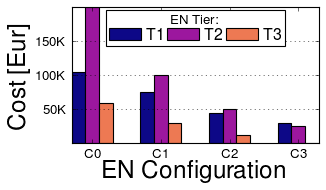

In [207]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 1

fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))
fig.tight_layout()

agents_ls = []
width = 0.2
x = np.arange(n)

## Infrastructure Cost
rects1 = ax.bar(x - width, T1_RATIO_VEC_ABS * 300, width, label='T1', edgecolor="black", color=cls[0])
rects2 = ax.bar(x, T2_RATIO_VEC_ABS * 1000, width, label='T2', color=cls[1])
rects3 = ax.bar(x + width, T3_RATIO_VEC_ABS * 6000, width, label='T3', color=cls[2])

ax.grid(axis="y")
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(("C0","C1", "C2", "C3"), fontsize=12)
ax.set_yticklabels(("","50K", "100K", "150K", ""), fontsize=12)
ax.set_ylabel("Cost [Eur]")
ax.set_xlabel('EN Configuration', labelpad=-1)
ax.legend(fontsize=9)
# ax.set_title("Theorized Infrastructure Cost")

ax.set_xlim(-0.3, 3.3)

ax.legend(ncol=3,borderpad=0.2, loc=9,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.15, columnspacing=0.2, title='EN Tier:')


fig.savefig("../plots/sss/infrastructure_cost_4_cases.pdf",  bbox_inches="tight")

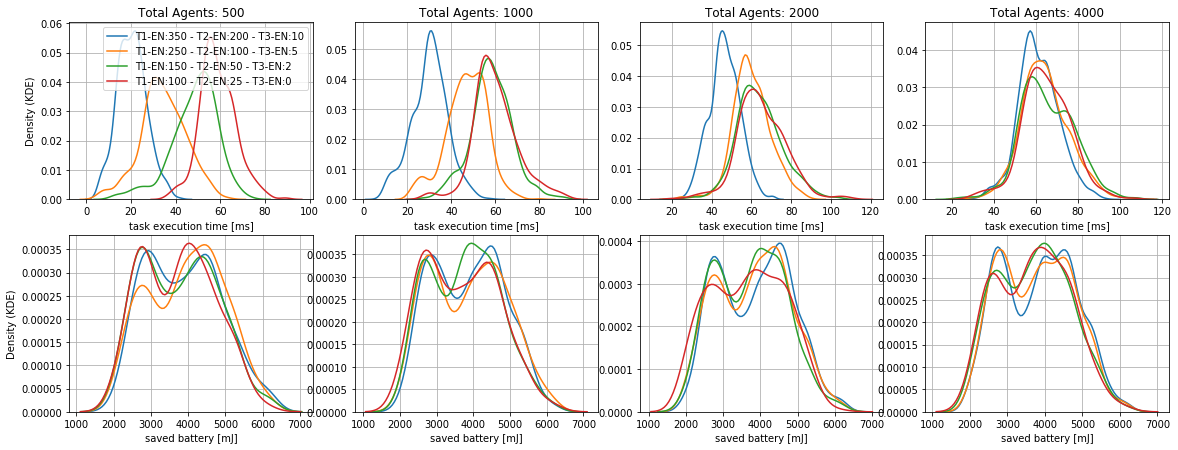

In [11]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 2

fig, ax = plt.subplots(m, n, figsize=(16, 6), constrained_layout=False)
fig.tight_layout()

agents_ls = []

## Latency
for i in range(n):
    agents_ls.append(RESULTS[0 + n*i][1])
    agents_ls.append(RESULTS[1 + n*i][1])
    agents_ls.append(RESULTS[2 + n*i][1])
    agents_ls.append(RESULTS[3 + n*i][1])

    for idx, agents in enumerate(agents_ls):
        curr_lat = list(map(lambda a: a.total_latency(), filter(lambda a: a.offload_target != Offloaded.Local, agents)))
        saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
        #curr_lat = list(map(lambda a: a.current_latency, agents))
        
        #TIER_1_EN = int(round(total_ap * T1_RATIO_VEC_REL[idx]))
        #TIER_2_EN = int(T2_RATIO_VEC_REL[idx] * TARGET_MA[i])
        #TIER_3_EN = int(T3_RATIO_VEC_REL[idx] * TARGET_MA[i])
        
        TIER_1_EN = T1_RATIO_VEC_ABS[idx]
        TIER_2_EN = T2_RATIO_VEC_ABS[idx]
        TIER_3_EN = T3_RATIO_VEC_ABS[idx]

        label="T1-EN:{} - T2-EN:{} - T3-EN:{}".format(TIER_1_EN, TIER_2_EN, TIER_3_EN)

        if i == 0:
            sns.distplot(curr_lat, hist=False, ax=ax[0][i], label=label)
        else:
            sns.distplot(curr_lat, hist=False, ax=ax[0][i])
            
        sns.distplot(saved_energy, hist=False, ax=ax[1][i])
            
    for row in range(m):
        if row == 0:
            ax[row][i].grid()
            ax[row][i].set_xlabel('task execution time [ms]')
            ax[row][i].set_title("Total Agents: {}".format(TARGET_MA[i])) 
        else:
            ax[row][i].grid()
            ax[row][i].set_xlabel('saved battery [mJ]')

            

    agents_ls = []

ax[0][0].legend()
ax[0][0].set_ylabel('Density (KDE)')
ax[1][0].set_ylabel('Density (KDE)')
    
fig.subplots_adjust(hspace=0.2)
# fig.suptitle(
#     "Total AP:{} - FPS Threshold: 15"
#     .format(total_ap, hp.FPS), fontsize=16, y=1.1)
fig.savefig("../plots/sss/ma_latency_energy_distribution_4_cases.pdf", bbox_inches="tight")

# added plots

In [19]:
from entities.mobile_agent import Offloaded

In [20]:
n = len(TARGET_MA)
m = 2

agents_ls = []

latency_lst = []
savedngr_lst = []

## Latency
for i in range(n):
    agents_ls.append(RESULTS[0 + n*i][1])
    agents_ls.append(RESULTS[1 + n*i][1])
    agents_ls.append(RESULTS[2 + n*i][1])
    agents_ls.append(RESULTS[3 + n*i][1])

    for idx, agents in enumerate(agents_ls):
        curr_lat = list(map(lambda a: a.total_latency(), filter(lambda a: a.offload_target != Offloaded.Local, agents)))
        saved_energy = list(map(lambda a: a.get_local_power_drain() - a.current_power_drain, filter(lambda a: a.offload_target == Offloaded.Edge, agents)))
        
        TIER_1_EN = T1_RATIO_VEC_ABS[idx]
        TIER_2_EN = T2_RATIO_VEC_ABS[idx]
        TIER_3_EN = T3_RATIO_VEC_ABS[idx]

        label="${:d},{:d},{:d}$".format(TIER_1_EN, TIER_2_EN, TIER_3_EN)
        
        latency_lst.append(pd.DataFrame(curr_lat, columns=['value'])\
                                .assign(label=label,
                                        TA=TARGET_MA[i]))
        savedngr_lst.append(pd.DataFrame(saved_energy, columns=['value'])\
                                .assign(label=label,
                                        TA=TARGET_MA[i]))

    agents_ls = []

In case you want to change the color of the boxes, change the `palette` into anything else you can find here:

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

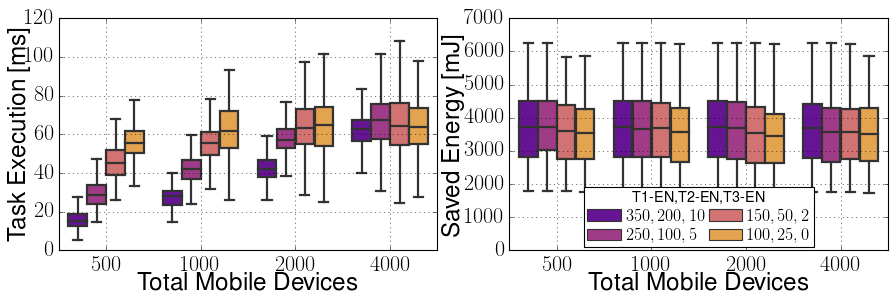

In [221]:
fig,axs = plt.subplots(1,2,figsize=(11, 3.6))

sns.boxplot(x='TA', y='value', hue='label',
            data=pd.concat(latency_lst,axis=0).reset_index(drop=True), ax=axs[0],
            showfliers=False, palette="plasma") #"Greys" if you want B&W
axs[0].set_ylabel('Task Execution [ms]', labelpad=-6)
axs[0].legend().remove()

sns.boxplot(x='TA', y='value', hue='label',
            data=pd.concat(savedngr_lst,axis=0).reset_index(drop=True), ax=axs[1], 
            palette="plasma") #"Greys" if you want B&W
axs[1].set_ylabel('Saved Energy [mJ]', labelpad=0)
L=axs[1].legend(loc=8, fontsize=15, ncol=2,
              title='T1-EN,T2-EN,T3-EN', borderpad=0.2,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.2, columnspacing=0.2)
L.get_title().set_fontsize(13)
axs[1].set_ylim(0,7000)

for ax in axs:
    ax.grid()
    ax.set_xlabel('Total Mobile Devices', labelpad=-1.7)
    ax.set_xticklabels(['$500$','$1000$','$2000$','$4000$'])

plt.tight_layout(pad=0, w_pad=0.3)
fig.savefig("../plots/sss/ma_latency_energy_boxplot_4_cases.pdf", bbox_inches="tight")

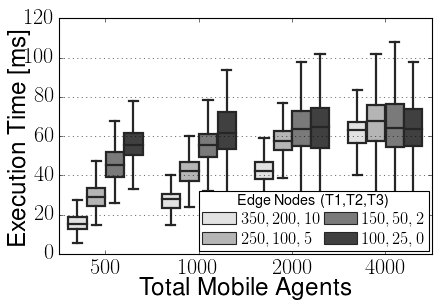

In [72]:
fig,ax = plt.subplots(figsize=(5.3, 3.65))

sns.boxplot(x='TA', y='value', hue='label',
            data=pd.concat(latency_lst,axis=0).reset_index(drop=True), ax=ax,
            showfliers=False, palette="Greys")
ax.set_ylabel('Execution Time [ms]', labelpad=-6)
L=ax.legend(loc=4, fontsize=15, ncol=2,
              title='Edge Nodes (T1,T2,T3)', borderpad=0.2,
                labelspacing=0.1, handletextpad=0.3,
                borderaxespad=0.2, columnspacing=0.2)
L.get_title().set_fontsize(13)

ax.grid(axis='y')
ax.set_xlabel('Total Mobile Agents', labelpad=-1.2)
ax.set_xticklabels(['$500$','$1000$','$2000$','$4000$'])

plt.tight_layout(pad=0, w_pad=0.3)

In [ ]:
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

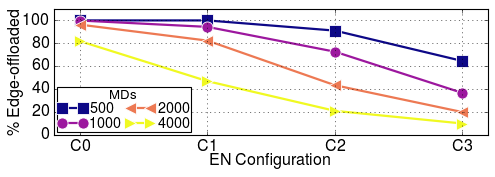

In [220]:
from entities.mobile_agent import Offloaded

n = len(TARGET_MA)
m = 1

fig, ax = plt.subplots(1, 1, figsize=(6, 2))

agents_ls = []
new_agents = []
markers = ["s", "o", "<", ">"]

cls = plt.cm.get_cmap("plasma", n).colors

## Offload distribution
for i in range(n):
    agents_ls.append(RESULTS[0 + n*i][1])
    agents_ls.append(RESULTS[1 + n*i][1])
    agents_ls.append(RESULTS[2 + n*i][1])
    agents_ls.append(RESULTS[3 + n*i][1])

    ratio = []
    
    for idx, agents in enumerate(agents_ls):
        l = len(list(filter(lambda a: a.offload_target == Offloaded.Local ,agents)))
        e = len(list(filter(lambda a: a.offload_target == Offloaded.Edge ,agents)))
        c = len(list(filter(lambda a: a.offload_target == Offloaded.Cloud ,agents)))
        
        ratio.append(e / (l + e + c))
        
    sns.lineplot(x=np.arange(n), y=ratio, label="{}".format(TARGET_MA[i]), color=cls[i],
                 markers=True, dashes=False, marker=markers[i], zorder=1)
        
    agents_ls = []

ax.grid(zorder=0)
ax.set_xlabel('EN Configuration', fontsize=14.5, labelpad=0)
ax.set_xticklabels(("C0","C1", "C2", "C3"),  fontsize=14.5)
ax.set_yticklabels((0,20,40,60,80,100), fontsize=14.5)
ax.set_ylabel('\% Edge-offloaded', fontsize=14.5, labelpad=0)
# ax.set_title("Ratio of MA served by an EN")
ax.set_xticks(np.arange(n))

ax.legend(ncol=2,borderpad=0.1, loc=3, fontsize=13,
                labelspacing=0.05, handletextpad=0.25,
                borderaxespad=0.15, columnspacing=0.2, title='MDs')
ax.set_ylim(0.0, 1.1)
ax.set_xlim(-0.2, 3.2)

fig.tight_layout(pad=0)
fig.savefig("../plots/sss/ma_ratio.pdf",  bbox_inches="tight")